# Healthcare Lab (Regression)

**Learning Objectives:**
  * Define and fit regression using Decision Trees
  * Gain exposure to healthcare related DataSets

## Context of the dataset

### 1. The dataset is consisted of records corresponding to medical events.
### 2. Each medical event is uniquely identified by `MedicalClaim`.
### 3. A given medical event might involve several medical procedures.
### 4. Each medical procedure is uniquely identified by `ClaimItem`
### 5. A given medical procedure is characterized by `PrincipalDiagnosisDesc`,`PrincipalDiagnosis`,`RevenueCodeDesc`, `RevenueCode`, `TypeFlag` and `TotalExpenses`

### 6. Each medical procedure involves: `MemberName`,`MemberID`,`County`,`HospitalName`, `HospitalType`, `StartDate`,`EndDate`


## 1. Library Import

In [1]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
import warnings
warnings.filterwarnings("ignore")

## 2. Data loading and DataFrame creation

In [4]:
HealthCareDataSet=pd.read_csv("https://github.com/thousandoaks/Python4DS-I/raw/main/datasets/HealthcareDataset_PublicRelease.csv",sep=',',parse_dates=['StartDate','EndDate','BirthDate'])

In [5]:
HealthCareDataSet.head(3)

,Id,MemberName,MemberID,County,MedicalClaim,ClaimItem,HospitalName,HospitalType,StartDate,EndDate,PrincipalDiagnosisDesc,PrincipalDiagnosis,RevenueCodeDesc,RevenueCode,TypeFlag,BirthDate,TotalExpenses
0,634363,e659f3f4,6a380a28,6f943458,c1e3436737c77899,18,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,15.148
1,634364,e659f3f4,6a380a28,6f943458,c1e3436737c77899,21,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,3.073
2,634387,e659f3f4,6a380a28,6f943458,c1e3436737c77899,10,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,LABORATORY - CLINICAL DIAGNOSTIC: HEMATOLOGY,305.0,ER,1967-05-13,123.900


In [6]:
HealthCareDataSet.describe()

,Id,ClaimItem,StartDate,EndDate,RevenueCode,BirthDate,TotalExpenses
count,52563.000000,52563.000000,52563,52563,52563.000000,52563,52563.000000
mean,685655.197953,12.023990,2020-06-21 00:12:27.902516992,2020-06-24 21:03:58.958963200,386.321995,1948-05-11 14:05:37.378003712,2735.230373
min,634363.000000,1.000000,2020-01-01 00:00:00,2020-01-01 00:00:00,24.000000,1921-01-18 00:00:00,0.000000
25%,658574.500000,5.000000,2020-03-09 00:00:00,2020-03-13 00:00:00,301.000000,1939-11-10 00:00:00,194.642000
50%,684404.000000,10.000000,2020-06-22 00:00:00,2020-06-26 00:00:00,307.000000,1947-05-12 00:00:00,675.262000
75%,712375.500000,16.000000,2020-09-25 00:00:00,2020-09-29 00:00:00,450.000000,1953-12-02 00:00:00,2309.265000
max,741736.000000,127.000000,2020-12-31 00:00:00,2020-12-31 00:00:00,942.000000,1999-08-09 00:00:00,504533.400000
std,30913.839360,10.747558,NaN,NaN,158.551733,NaN,8292.178928


In [7]:
HealthCareDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52563 entries, 0 to 52562
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Id                      52563 non-null  int64         
 1   MemberName              52563 non-null  object        
 2   MemberID                52563 non-null  object        
 3   County                  52563 non-null  object        
 4   MedicalClaim            52563 non-null  object        
 5   ClaimItem               52563 non-null  int64         
 6   HospitalName            52563 non-null  object        
 7   HospitalType            52563 non-null  object        
 8   StartDate               52563 non-null  datetime64[ns]
 9   EndDate                 52563 non-null  datetime64[ns]
 10  PrincipalDiagnosisDesc  52563 non-null  object        
 11  PrincipalDiagnosis      52563 non-null  object        
 12  RevenueCodeDesc         52561 non-null  object

In [8]:
HealthCareDataSet['AgeAtMedicalEvent']=(HealthCareDataSet['StartDate']-HealthCareDataSet['BirthDate'])

In [9]:
HealthCareDataSet['AgeAtMedicalEvent'].dt.total_seconds() / (365.25 * 24 * 60 * 60)

,AgeAtMedicalEvent
0,52.657084
1,52.657084
2,52.657084
3,52.657084
4,52.657084
...,...
52558,80.637919
52559,70.258727
52560,70.258727
52561,70.258727


In [10]:
HealthCareDataSet['AgeAtMedicalEvent']=HealthCareDataSet['AgeAtMedicalEvent'].dt.total_seconds() / (365.25 * 24 * 60 * 60)

In [11]:
## We need to compute the duration of each Medical Treatment
HealthCareDataSet['MedicalTreatmentDuration']=(HealthCareDataSet['EndDate']-HealthCareDataSet['StartDate']).dt.days

In [12]:
HealthCareDataSet.groupby('County').count()

,Id,MemberName,MemberID,MedicalClaim,ClaimItem,HospitalName,HospitalType,StartDate,EndDate,PrincipalDiagnosisDesc,PrincipalDiagnosis,RevenueCodeDesc,RevenueCode,TypeFlag,BirthDate,TotalExpenses,AgeAtMedicalEvent,MedicalTreatmentDuration
County,,,,,,,,,,,,,,,,,,
02af982d,23525,23525,23525,23525,23525,23525,23525,23525,23525,23525,23525,23525,23525,23525,23525,23525,23525,23525
217dc01f,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59
33b7d74d,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
39825de7,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165
425a37b2,9468,9468,9468,9468,9468,9468,9468,9468,9468,9468,9468,9468,9468,9468,9468,9468,9468,9468
5597ffc0,443,443,443,443,443,443,443,443,443,443,443,443,443,443,443,443,443,443
6f0b5b6c,555,555,555,555,555,555,555,555,555,555,555,555,555,555,555,555,555,555
6f943458,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849
7a56b047,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7


In [13]:
HealthCareDataSet.groupby('TypeFlag').count()

,Id,MemberName,MemberID,County,MedicalClaim,ClaimItem,HospitalName,HospitalType,StartDate,EndDate,PrincipalDiagnosisDesc,PrincipalDiagnosis,RevenueCodeDesc,RevenueCode,BirthDate,TotalExpenses,AgeAtMedicalEvent,MedicalTreatmentDuration
TypeFlag,,,,,,,,,,,,,,,,,,
ER,23978,23978,23978,23978,23978,23978,23978,23978,23978,23978,23978,23978,23978,23978,23978,23978,23978,23978
INP,28585,28585,28585,28585,28585,28585,28585,28585,28585,28585,28585,28585,28583,28585,28585,28585,28585,28585


### 3. Cost Predictor (Patient unit of analysis)
#### We need to try to predict expected costs for any given medical intervention
#### We will consider the following features: ['County','Age','Duration','Principal Diagnosis','TypeFlag'] with 'TotalExpenses' as the reponse variable.

#### We aggregate all Claim Items associated to a specific Medical Claim

In [14]:
HealthCareDataSetGroupedByMedicalClaim=HealthCareDataSet.groupby(['MemberID','County','MedicalClaim','PrincipalDiagnosis','TypeFlag','AgeAtMedicalEvent','MedicalTreatmentDuration']).agg({'TotalExpenses':'sum'}).reset_index()
HealthCareDataSetGroupedByMedicalClaim

,MemberID,County,MedicalClaim,PrincipalDiagnosis,TypeFlag,AgeAtMedicalEvent,MedicalTreatmentDuration,TotalExpenses
0,00024834,adb3fb00,24a081d0f754e53e,S72.142A,INP,88.158795,7,158558.610
1,00024834,adb3fb00,4b5a15fb93cd31ba,K74.69,INP,88.216290,7,109266.528
2,00198770,425a37b2,42efad506c7fa1a2,R05,ER,62.770705,0,5725.587
3,004980c9,fd218584,c3c31f9339fef298,S98.112A,INP,72.780287,7,172035.920
4,004d7fd0,ea48569b,e64af0c1c6887443,E86.0,ER,88.936345,0,1821.890
...,...,...,...,...,...,...,...,...
3356,fee15f24,02af982d,bee070b6550ba6b3,R07.89,ER,79.682409,1,35701.561
3357,ff3c17df,adb3fb00,7bb641881f53aca0,M17.11,INP,81.946612,1,91724.941
3358,ff64d58b,02af982d,0ae12c3b63e8c251,S68.121A,ER,69.081451,0,5034.834
3359,ff64d58b,02af982d,7f1919675967fceb,S68.621A,ER,69.081451,0,10374.301


### 4. First model (Decision Tree)

In [15]:
# Choose target and features
y = HealthCareDataSetGroupedByMedicalClaim['TotalExpenses']

features = ['County', 'PrincipalDiagnosis','TypeFlag','AgeAtMedicalEvent','MedicalTreatmentDuration']
X = HealthCareDataSetGroupedByMedicalClaim[features]

In [16]:
X

,County,PrincipalDiagnosis,TypeFlag,AgeAtMedicalEvent,MedicalTreatmentDuration
0,adb3fb00,S72.142A,INP,88.158795,7
1,adb3fb00,K74.69,INP,88.216290,7
2,425a37b2,R05,ER,62.770705,0
3,fd218584,S98.112A,INP,72.780287,7
4,ea48569b,E86.0,ER,88.936345,0
...,...,...,...,...,...
3356,02af982d,R07.89,ER,79.682409,1
3357,adb3fb00,M17.11,INP,81.946612,1
3358,02af982d,S68.121A,ER,69.081451,0
3359,02af982d,S68.621A,ER,69.081451,0


#### 4.1. Encoding of categorical features

Our Dataset has categorical features
 We nee to code them before fitting any model

In [17]:
# Identify categorical features
categorical_features = X.select_dtypes(include=['object']).columns # Select columns with 'object' dtype
categorical_features

Index(['County', 'PrincipalDiagnosis', 'TypeFlag'], dtype='object')

In [18]:
# Create an OrdinalEncoder
enc = OrdinalEncoder()

In [19]:
# Fit and transform the categorical features
X[categorical_features] = enc.fit_transform(X[categorical_features])
X

,County,PrincipalDiagnosis,TypeFlag,AgeAtMedicalEvent,MedicalTreatmentDuration
0,11.0,871.0,1.0,88.158795,7
1,11.0,420.0,1.0,88.216290,7
2,4.0,606.0,0.0,62.770705,0
3,18.0,934.0,1.0,72.780287,7
4,16.0,93.0,0.0,88.936345,0
...,...,...,...,...,...
3356,0.0,615.0,0.0,79.682409,1
3357,11.0,485.0,1.0,81.946612,1
3358,0.0,853.0,0.0,69.081451,0
3359,0.0,855.0,0.0,69.081451,0


#### 4.2. Dataset Split


In [20]:
# split data into training and test data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [21]:
X_train.head()

,County,PrincipalDiagnosis,TypeFlag,AgeAtMedicalEvent,MedicalTreatmentDuration
1190,9.0,146.0,0.0,39.841205,0
745,0.0,110.0,0.0,73.500342,0
1853,0.0,538.0,1.0,81.738535,3
2795,7.0,67.0,1.0,83.961670,6
411,0.0,78.0,1.0,55.030801,3


#### 4.3 Model fit

In [22]:
# Model fitting

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

### 4.4. Model visualization

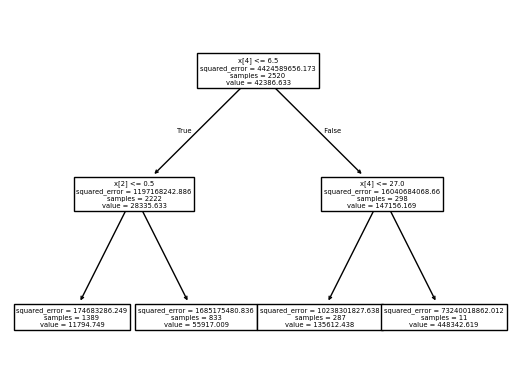

In [23]:
from sklearn import tree
tree.plot_tree(tree_reg);

#### 4.5. Model evaluation

In [24]:
# Make predictions on the test set
y_test_predicted = tree_reg.predict(X_test)

In [25]:
## Model evaluation
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_test_predicted))



23584.45271699706


##### Cross validation


In [26]:
# prompt: cross validate the model

# Perform cross-validation
cv_results = cross_validate(tree_reg, X, y, cv=5, scoring=('r2', 'neg_mean_squared_error'))

# Print the results
print("Cross-validation R^2 scores:", cv_results['test_r2'])
print("Cross-validation MSE scores:", -cv_results['test_neg_mean_squared_error'])
print("Mean R^2:", np.mean(cv_results['test_r2']))
print("Mean MSE:", -np.mean(cv_results['test_neg_mean_squared_error']))

Cross-validation R^2 scores: [0.49798338 0.63743858 0.34454594 0.24646517 0.40922149]
Cross-validation MSE scores: [3.27159930e+09 2.70874894e+09 2.26550210e+09 2.99993575e+09
 1.50382749e+09]
Mean R^2: 0.4271309107139681
Mean MSE: 2549922715.540926


In [27]:
train_sizes, train_scores, valid_scores = learning_curve(
    DecisionTreeRegressor(max_depth=2), X, y, train_sizes=np.linspace(0.01, 1.0, 40),
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

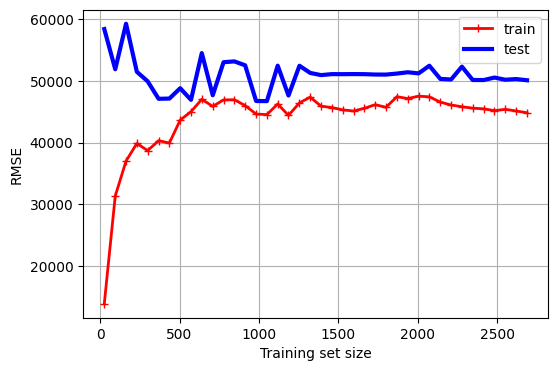

In [28]:
plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="test")

plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
#plt.yscale('log') # Set y-axis to log scale

#plt.axis([-100, 20000, 40000, 120000])

plt.show()

#### Based on the figure above we conclude that the first linear model is underfitting.
#### To see why, first let’s look at the training error. When there are just one or two instances in the training set, the model can fit them perfectly, which is why the curve starts at zero (low RMSE).But as new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly.


#### So the error on the training data goes up until it reaches a plateau, at which point adding new instances to the training set doesn’t make the average error much better (or worse).

#### These learning curves are typical of a model that’s underfitting. Both curves have reached a plateau; they are close to each other; both remain at large error levels.

### 5. Second model (Decision Tree)

#### Given the limitations of the previous model we try adding second order terms

In [29]:
# Model fitting

tree_reg = DecisionTreeRegressor(max_depth=5)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

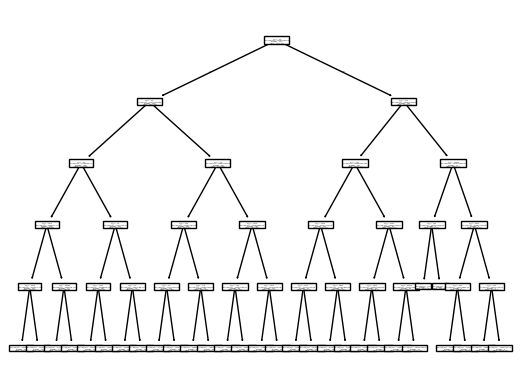

In [30]:
from sklearn import tree
tree.plot_tree(tree_reg);

In [31]:
# Make predictions on the test set
y_test_predicted = tree_reg.predict(X_test)

In [32]:
## Model evaluation
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_test_predicted))

21371.519182986456


### 5.1. Cross validation

In [33]:
# prompt: cross validate the model

# Perform cross-validation
cv_results = cross_validate(tree_reg, X, y, cv=5, scoring=('r2', 'neg_mean_squared_error'))

# Print the results
print("Cross-validation R^2 scores:", cv_results['test_r2'])
print("Cross-validation MSE scores:", -cv_results['test_neg_mean_squared_error'])
print("Mean R^2:", np.mean(cv_results['test_r2']))
print("Mean MSE:", -np.mean(cv_results['test_neg_mean_squared_error']))

Cross-validation R^2 scores: [ 0.53550462  0.61084169  0.37737848 -0.08845733  0.54320994]
Cross-validation MSE scores: [3.02707654e+09 2.90745814e+09 2.15202018e+09 4.33331273e+09
 1.16275969e+09]
Mean R^2: 0.3956954819883923
Mean MSE: 2716525455.4535556


#### 5.2 Learning Curves

In [34]:
train_sizes, train_scores, valid_scores = learning_curve(
    DecisionTreeRegressor(max_depth=5), X, y, train_sizes=np.linspace(0.01, 1.0, 40),
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

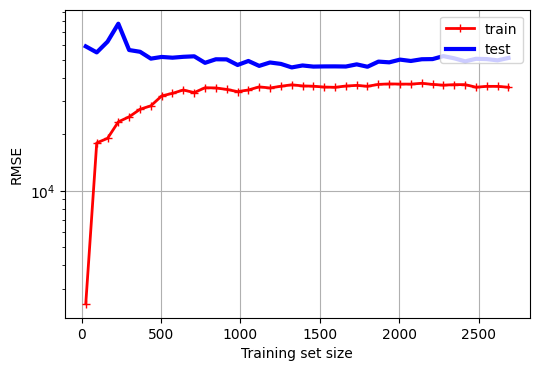

In [35]:
plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="test")

plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.yscale('log') # Set y-axis to log scale

#plt.axis([-100, 20000, 40000, 120000])

plt.show()

#### Based on the previous figure we conclude that model does not improve over the previous one.